In [1]:
import pandas as pd
from config.paths import get_project_root_path


DATASET_NAME = "les_miserables"

data_path = (
    get_project_root_path()
    .joinpath("data")
    .joinpath("experiments")
    .joinpath("regression_analysis")
    .joinpath("grid")
    .joinpath(f"{DATASET_NAME}.pkl")
)
data_df = pd.read_pickle(data_path)


In [2]:
data_df

,data_id,pos,angular_resolution,aspect_ratio,crossing_angle,crossing_number,gabriel_graph_property,ideal_edge_lengths,neighborhood_preservation,node_resolution,stress,number_of_pivots,number_of_iterations,eps
0,bb2b7119-883e-4089-b4be-ec98b2150af5,"{'Napoleon': (-43.88753890991211, 22.703603744...",995.080139,-0.643333,1003.676880,2363.0,99974.500000,44.471745,-0.270000,22620.404297,503.152740,5,10,0.05
1,4e9ce796-cd3d-48d0-a551-59dfc4c7b4b3,"{'Napoleon': (37.24515914916992, 23.3625545501...",1029.114502,-0.781833,995.103638,2506.0,84578.078125,34.284576,-0.209524,14894.092773,543.295227,5,10,0.05
2,5f4303bd-4857-47b3-bc66-664737b0acd7,"{'Napoleon': (-104.46096801757812, 22.14434051...",977.956604,-0.762826,827.940247,1980.0,60198.386719,40.869736,-0.372973,20840.253906,340.642731,5,10,0.05
3,3c22943f-fe59-4f84-ac0f-d6d70f0c9259,"{'Napoleon': (-42.352447509765625, -64.2898406...",1008.232727,-0.820159,915.304993,2173.0,78277.851562,49.901482,-0.349270,24517.285156,393.484222,5,10,0.05
4,891e3ff8-8a70-4e41-a1b9-b2aed4773038,"{'Napoleon': (52.90644073486328, -86.452156066...",1011.226013,-0.962789,968.700562,2514.0,83527.523438,44.770088,-0.286076,21644.873047,443.041748,5,10,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,63900b70-f2a8-4c46-aa40-ecacbd7d1c77,"{'Napoleon': (-21.87883949279785, -116.3702239...",963.601440,-0.951306,738.795288,1716.0,37583.839844,40.732639,-0.433004,26084.271484,263.999084,100,200,1.00
79996,2a617a14-1107-4faf-a1dc-39054737c62b,"{'Napoleon': (191.61720275878906, -63.49407577...",965.940918,-0.944355,734.848755,1858.0,46779.156250,39.943027,-0.376694,25998.394531,267.409424,100,200,1.00
79997,fb3ef4b5-5e72-4bbe-9c8a-5404c12cafb6,"{'Napoleon': (56.74190902709961, 5.02871751785...",960.603394,-0.911663,842.327087,1999.0,38525.578125,37.485138,-0.405256,24615.376953,263.364380,100,200,1.00
79998,1dff3d41-310f-427f-abc0-c5e9c509d98c,"{'Napoleon': (2.6762869358062744, -179.4757385...",977.155334,-0.936171,707.893921,1715.0,49649.781250,48.228676,-0.470333,24802.373047,274.156219,100,200,1.00


In [3]:
# import seaborn as sns


# sns.pairplot(data_df)


In [4]:
# import plotly.express as px
# from itertools import combinations


# for comb in combinations(PARAMS_NAMES, 2):
#     for qm_name in ALL_QM_NAMES:
#         fig = px.scatter_3d(data_df, x=comb[0], y=comb[1], z=qm_name)
#         fig.show()

In [5]:
from config.quality_metrics import ALL_QM_NAMES


PARAMS_NAMES = ["number_of_pivots", "number_of_iterations", "eps"]

x = data_df[PARAMS_NAMES]
y = data_df[ALL_QM_NAMES]
x1 = data_df[PARAMS_NAMES[0]]
x2 = data_df[PARAMS_NAMES[1]]
x3 = data_df[PARAMS_NAMES[2]]


/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_10587/4122743073.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["aspect_ratio"] = y["aspect_ratio"] * -1
/var/folders/23/db_nbhl55hvds1mt0zx_p14h0000gn/T/ipykernel_10587/4122743073.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["neighborhood_preservation"] = y["neighborhood_preservation"] * -1


In [6]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit(x)
xss = sscaler.transform(x)
yss = {}
for qm_name in ALL_QM_NAMES:
    y = data_df[[qm_name]]
    sscaler.fit(y)
    yss[qm_name] = sscaler.transform(y)


In [13]:
x

,number_of_pivots,number_of_iterations,eps
0,5,10,0.05
1,5,10,0.05
2,5,10,0.05
3,5,10,0.05
4,5,10,0.05
...,...,...,...
79995,100,200,1.00
79996,100,200,1.00
79997,100,200,1.00
79998,100,200,1.00


In [12]:
import statsmodels.api as sm

x_add_const = sm.add_constant(xss)
for qm_name in ALL_QM_NAMES:
    model_sm = sm.OLS(yss[qm_name], x_add_const).fit()
    print('#######################################################################')
    print('#######################################################################')
    print('#######################################################################')
    print(qm_name)
    print(model_sm.summary())

#######################################################################
#######################################################################
#######################################################################
angular_resolution
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                 2.619e+04
Date:                Sun, 28 May 2023   Prob (F-statistic):               0.00
Time:                        17:07:45   Log-Likelihood:                -86148.
No. Observations:               80000   AIC:                         1.723e+05
Df Residuals:                   79996   BIC:                         1.723e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                 

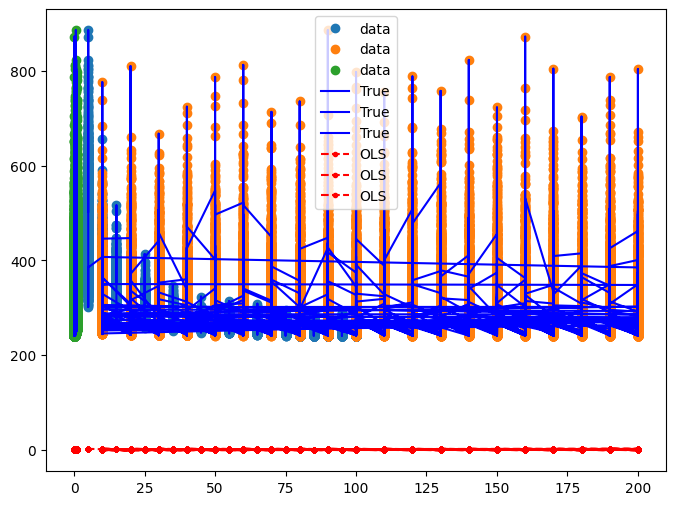

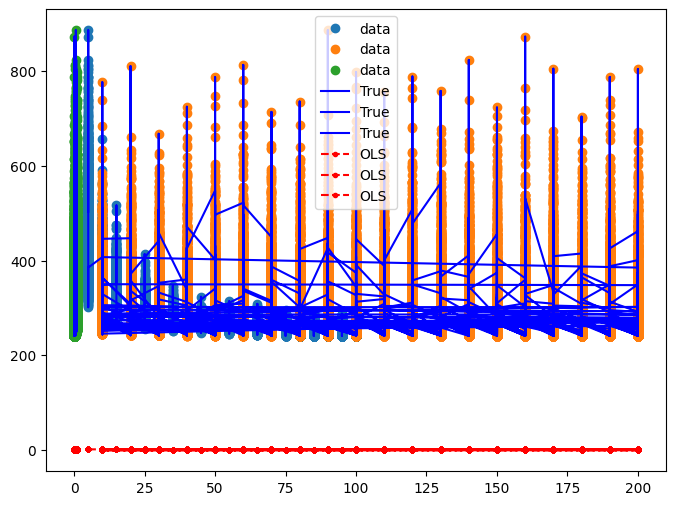

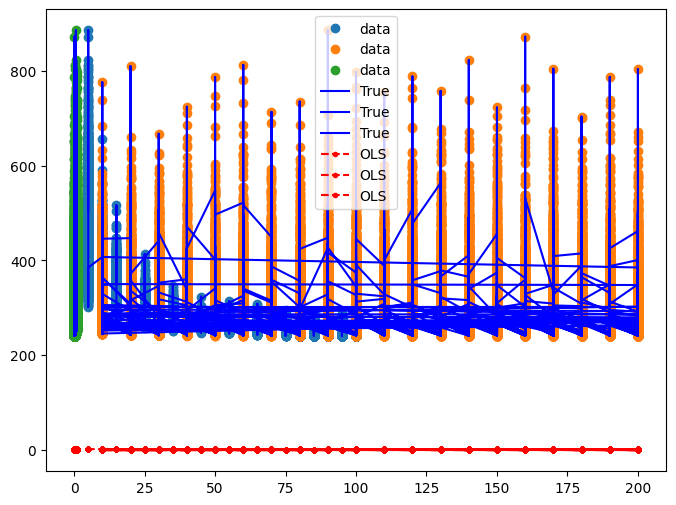

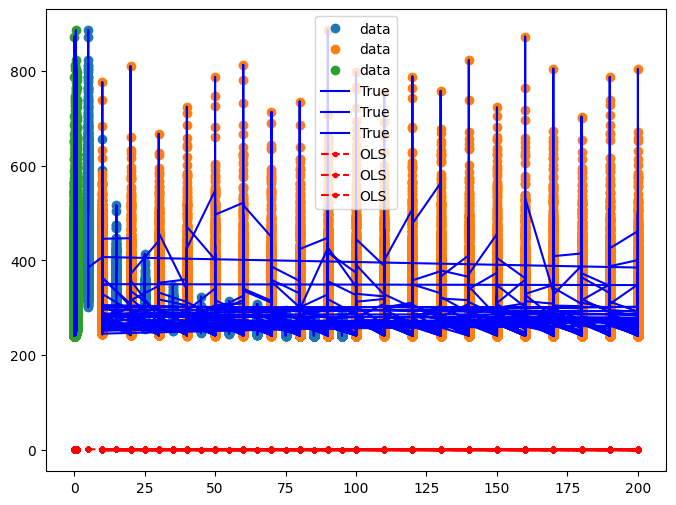

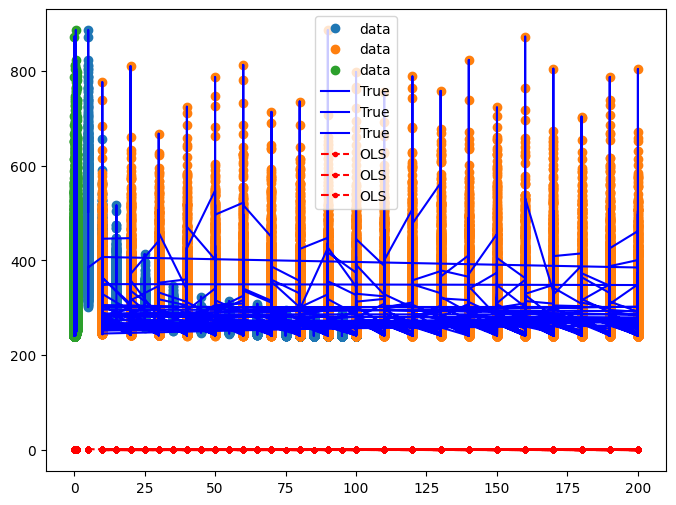

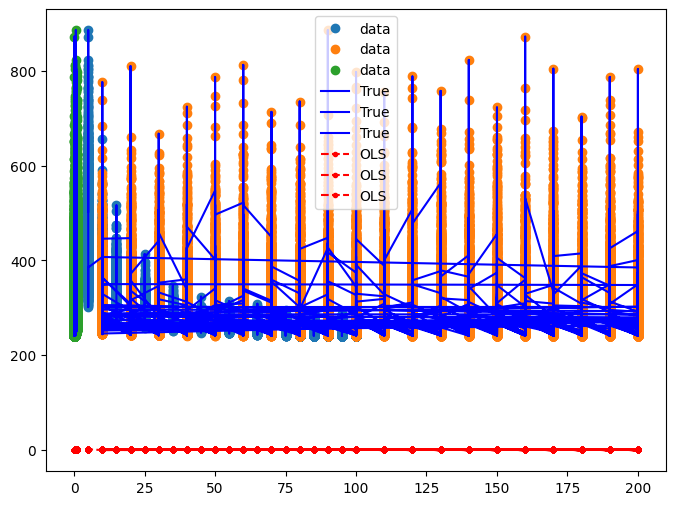

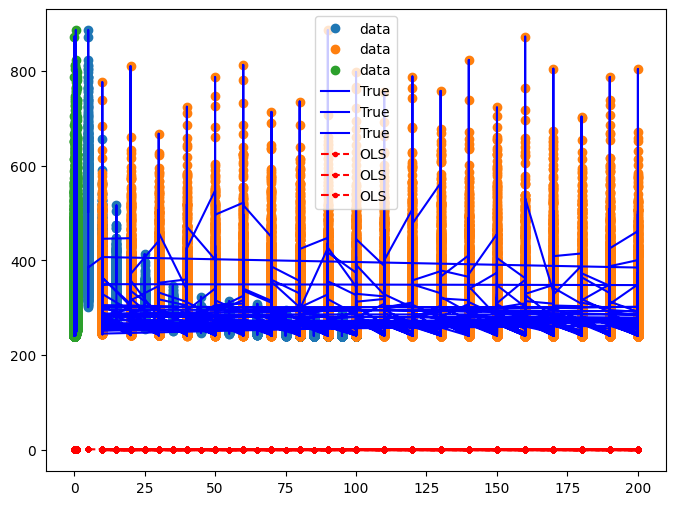

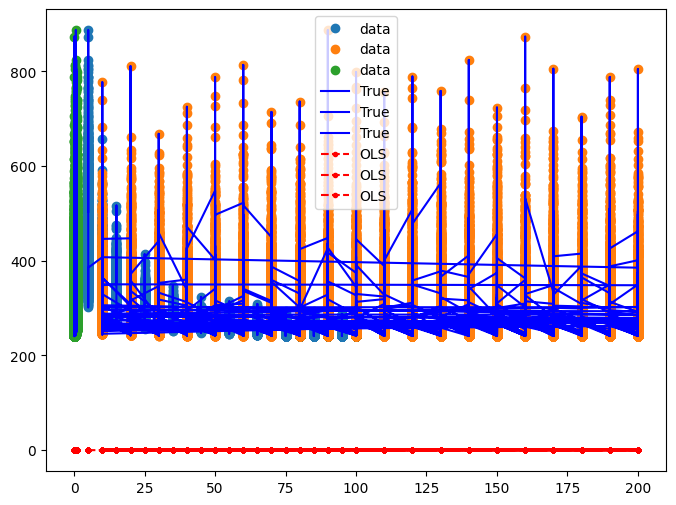

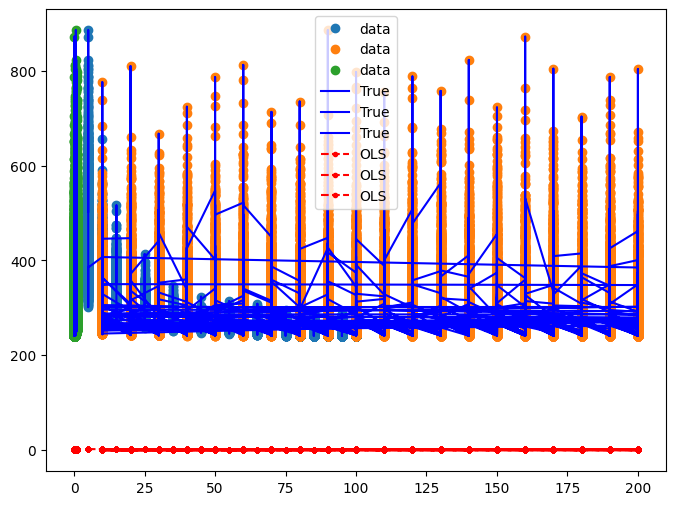

In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig=plt.figure()
ax=Axes3D(fig)

ax.scatter3D(x1, x2, y)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

mesh_x1 = np.arange(x1.min()[0], x1.max()[0], (x1.max()[0]-x1.min()[0])/20)
mesh_x2 = np.arange(x2.min()[0], x2.max()[0], (x2.max()[0]-x2.min()[0])/20)
mesh_x1, mesh_x2 = np.meshgrid(mesh_x1, mesh_x2)
mesh_y = model_lr.coef_[0][0] * mesh_x1 + model_lr.coef_[0][1] * mesh_x2 + model_lr.intercept_[0]
ax.plot_wireframe(mesh_x1, mesh_x2, mesh_y)
plt.show()

print(model_lr.coef_)
print(model_lr.intercept_)
print(model_lr.score(x, y))